**Импортируем необходимые библиотеки**

In [114]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

**Создаем наборы данных**

Text(0.5, 1.0, 'Набор данных 3')

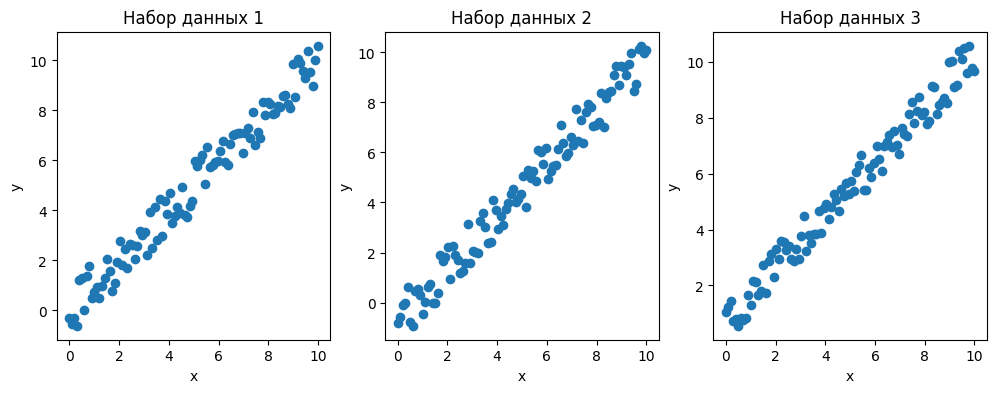

In [115]:
x1 = np.linspace(0, 10, 100)
y1 = x1 + np.random.random(100)*2-1

x2 = np.linspace(0, 10, 100)
y2 = 1.05*x2 + np.random.random(100)*2-1.7

x3 = np.linspace(0, 10, 100)
y3 = 0.95*x3 + np.random.random(100)*1.5

plt.figure(figsize=(12,4))
plt.subplot(1, 3, 1)
plt.scatter(x1, y1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Набор данных 1')

plt.subplot(1, 3, 2)
plt.scatter(x2, y2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Набор данных 2')

plt.subplot(1, 3, 3)
plt.scatter(x3, y3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Набор данных 3')

**Обучаем модель линейной регрессии**

MSE 0.390
R2 0.951


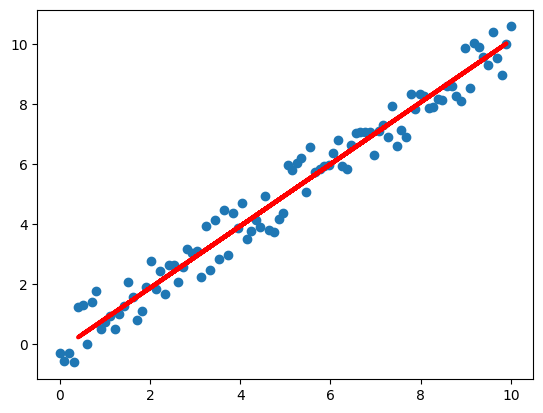

In [116]:
x1 = x1.reshape(100, 1)
y1 = y1.reshape(100, 1)

X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.25)

lin_regr = LinearRegression()
lin_regr.fit(X1_train, y1_train)
approx1 = lin_regr.predict(X1_test)
mse = mean_squared_error(y1_test, approx1)
r2 = r2_score(y1_test, approx1)
print(f'MSE {mse:.3f}')
print(f'R2 {r2:.3f}')

plt.scatter(x1, y1)
plt.plot(X1_test, approx1, color='red', linewidth=3)
plt.show()

np.savetxt('y1.csv', y1, delimiter=',')
np.savetxt('approx1.csv', approx1, delimiter=',')

**Создаем датасет с шумовыми данными**



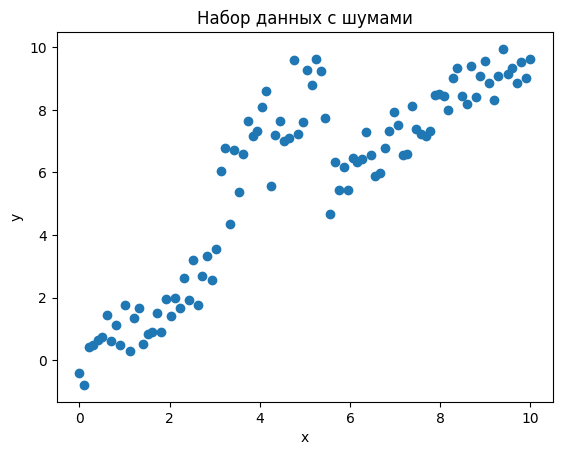

In [117]:
x = np.linspace(0, 10, 100)
y = x + np.random.random(100)*2-1

y[30:55] = y[30:55]*1.7

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Набор данных с шумами')
plt.show()

**Подготовим наборы данных для тестирования**

In [118]:
# Второй набор данных
x2 = x2.reshape(100, 1)
y2 = y2.reshape(100, 1)
approx2 = lin_regr.predict(x2)
np.savetxt('y2.csv', y2, delimiter=',')
np.savetxt('approx2.csv', approx2, delimiter=',')

# Третий набор данных
x3 = x3.reshape(100, 1)
y3 = y3.reshape(100, 1)
approx3 = lin_regr.predict(x3)
np.savetxt('y3.csv', y3, delimiter=',')
np.savetxt('approx3.csv', approx3, delimiter=',')

# Набор данных с шумами
x = x.reshape(100, 1)
y = y.reshape(100, 1)
approx = lin_regr.predict(x)
np.savetxt('y.csv', y, delimiter=',')
np.savetxt('approx.csv', approx, delimiter=',')

mse = mean_squared_error(y2, approx2)
r2 = r2_score(y2, approx2)
print(f'MSE второго набора {mse:.3f}')
print(f'R2 второго набора {r2:.3f}')

mse = mean_squared_error(y3, approx3)
r2 = r2_score(y3, approx3)
print(f'MSE третьего набора {mse:.3f}')
print(f'R2 третьего набора {r2:.3f}')

MSE второго набора 0.498
R2 второго набора 0.951
MSE третьего набора 0.525
R2 третьего набора 0.934


Принимаем порог допустимого значения **MSE = 1.0, R2 = 0.90**


**Создаем тест для контроля данных**

In [121]:
%%writefile test_datasets.py
import pytest
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score


@pytest.fixture()
def load_ys():
  y2 = np.loadtxt('y2.csv', delimiter=',')
  y3 = np.loadtxt('y3.csv', delimiter=',')
  y = np.loadtxt('y.csv', delimiter=',')

  return y2, y3, y


@pytest.fixture()
def load_approxes():
  approx2 = np.loadtxt('approx2.csv', delimiter=',')
  approx3 = np.loadtxt('approx3.csv', delimiter=',')
  approx = np.loadtxt('approx.csv', delimiter=',')

  return approx2, approx3, approx


def test_mse(load_ys, load_approxes):
  y2, y3, y = load_ys
  approx2, approx3, approx = load_approxes
  assert mean_squared_error(y2, approx2) < 1.0, 'Данные из второго набора имеют mse > 1.0'
  assert mean_squared_error(y3, approx3) < 1.0, 'Данные из третьего набора имеют mse > 1.0'
  assert mean_squared_error(y, approx) < 1.0, 'Данные из набора с шумами имеют mse > 1.0'


def test_r2(load_ys, load_approxes):
  y2, y3, y = load_ys
  approx2, approx3, approx = load_approxes
  assert r2_score(y2, approx2) > 0.9, 'Данные из второго набора имеют R2 < 0.9'
  assert r2_score(y3, approx3) > 0.9, 'Данные из третьего набора имеют R2 < 0.9'
  assert r2_score(y, approx) > 0.9, 'Данные из набора с шумами имеют R2 < 0.9'

Overwriting test_datasets.py


**Тестируем наборы данных**

In [122]:
!pytest -v test_datasets.py

============================= test session starts ==============================
platform linux -- Python 3.11.12, pytest-8.3.5, pluggy-1.5.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: typeguard-4.4.2, langsmith-0.3.38, anyio-4.9.0
collected 2 items                                                              

test_datasets.py::test_mse FAILED                                        [ 50%]
test_datasets.py::test_r2 FAILED                                         [100%]

=================================== FAILURES ===================================
___________________________________ test_mse ___________________________________

load_ys = (array([-8.30663078e-01, -5.81206363e-01, -1.07800857e-01, -3.21121855e-02,
        6.07366157e-01, -7.87685707e-01, -...59641,  9.06635534,  9.94604533,  9.13220622,
        9.33429326,  8.84799093,  9.54128424,  9.02264476,  9.6216864 ]))
load_approxes = (array([-0.18885341, -0.08479681,  0.01925979,  0.12331639,  0.22737

По результатам тестирования можно наблюдать сообщения об ошибках:

> FAILED test_datasets.py::test_mse - AssertionError: Данные из набора с шумами имеют mse > 1.0
>
> FAILED test_datasets.py::test_R2 - AssertionError: Данные из набора с шумами имеют R2 < 0.9

Исходя из установленных пороговых значений mse и R2, можно сделать вывод что датасет с шумами содержит большие отклонения в данных и тестирование не проходит
